       любое название
count       597.00000
mean         52.89263
std          18.70724
min           3.50000
25%          42.50000
50%          55.00000
75%          65.00000
max         105.70000
number of bins:11
a_bins [  3.5         12.79090909  22.08181818  31.37272727  40.66363636
  49.95454545  59.24545455  68.53636364  77.82727273  87.11818182
  96.40909091 105.7       ]
bins [  8.14545455  17.43636364  26.72727273  36.01818182  45.30909091
  54.6         63.89090909  73.18181818  82.47272727  91.76363636
 101.05454545]
Average dia numeric:	 53.15267245317496 Average dia volu:	 67.61760798988844
Местное время: Fri Sep 17 14:00:44 2021


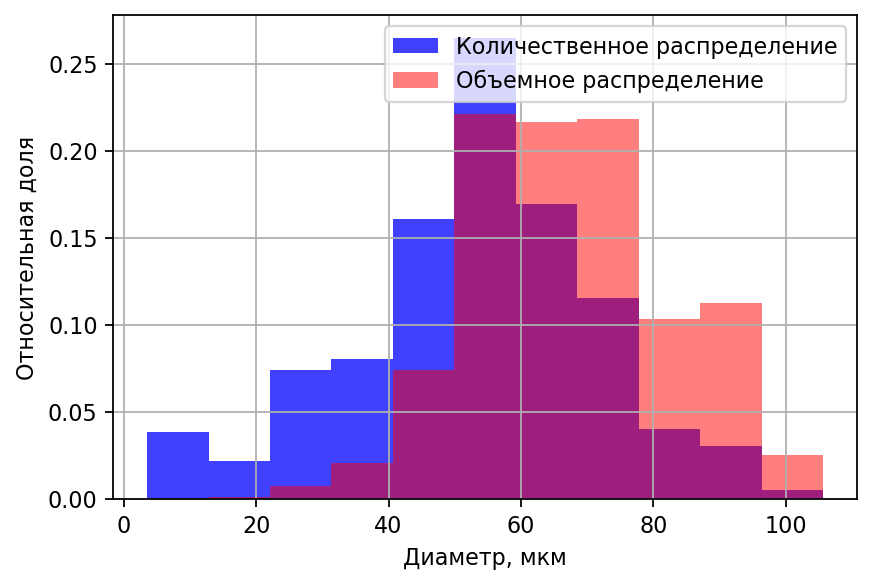

In [80]:
import pandas as pd
import numpy as np
import time
import os

#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

folder=os.getcwd()

tym = time.localtime() 
opt = time.strftime("%Y_%m_%d_%H_%M_%S",tym) 


filenaLL=folder +'\\Results_'+opt+'.txt'

Data50k = pd.read_csv('input.csv')

axc=print(Data50k.describe())
#print(Data50k.columns)
first_column = Data50k.iloc[:, 0]
#print(first_column)
norm_th=first_column.tolist()
we_list = norm_th[:]
for we in range(len(we_list)):
    we_list[we]=norm_th[we]**3
    
with open(filenaLL, 'a') as file:
    file.write(str(Data50k.describe()))

plotbins=int(input('number of bins:'))

fig, ax = plt.subplots(figsize=(6,4), facecolor='white', dpi= 160)

a_heights, a_bins = np.histogram(norm_th, bins=plotbins)
v_heights, v_bins = np.histogram(norm_th, bins=plotbins,weights=we_list,density=True)

started,endedd = a_bins[0],a_bins[len(a_bins)-1]
fuldist=endedd-started
delta=fuldist/(len(a_bins)-1)
bins = a_bins[:-1]
print("a_bins",a_bins)

for i in range(len(bins)):
    bins[i]=started+i*delta+delta*0.5
print("bins",bins)


width_a = (bins[1] - bins[0])/1.0


a_heightsd=a_heights/len(norm_th)
v_heightsd=v_heights/sum(v_heights)

avend=0
avevd=0
sumvd=0
sumnd=0

for i in range(len(bins)):
    bins[i]=started+i*delta+delta*0.5
    avend+=bins[i]*a_heightsd[i]
    avevd+=bins[i]*v_heightsd[i]
    sumnd+=a_heightsd[i]
    sumvd+=v_heightsd[i]


avevd=avevd/sumvd
avend=avend/sumnd
   
print("Average dia numeric:\t",avend,"Average dia volu:\t",avevd)


with open(filenaLL, 'a') as file:
    file.write("\nBins boundaries:\n")
    file.write(str(a_bins))
    file.write("\nNumber of spheres in each bin:\n")
    file.write(str(a_heights))
    file.write("\nNumerical prob. densities:\n")
    file.write(str(a_heightsd))
    file.write("\nVolumic prob. densities:\n")
    file.write(str(v_heightsd))

ax.grid()

ax.bar(bins, a_heightsd, width=width_a, facecolor='blue',alpha=0.75,label='Количественное распределение')#'cornflowerblue')
ax.bar(bins, v_heightsd, width=width_a,alpha=0.5, facecolor='red',label='Объемное распределение')#'cornflowerblue')

ax.set_xlabel('Диаметр, мкм')
ax.set_ylabel('Относительная доля')
plt.legend(loc='best')
#ax.set_title('text')

seconds = time.time()
local_time = time.ctime(seconds)
print("Местное время:", str(local_time))
now="Distrib_"+opt+".png"
plt.savefig(now)